In [1]:
#======================================================#
#     LAB 4 - MultiVariate Linear Regression using GD  #
#     Author: SHIKHAR ASTHANA                          #
#     Roll No. : 2K22/AFI/24                           #
#     Subject: ANN Lab (Anil Singh Parihar Sir)        #
#======================================================#

In [3]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#importing the dataset
dataset = pd.read_csv("advertising.csv")
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
dataset.shape

(200, 4)

In [6]:
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
#keeping only the first column and target column

reg_data = dataset.copy()

#Separating the columns based on independent and dependent variable.
x = reg_data[['TV', 'Radio', 'Newspaper']]
y = reg_data['Sales']

In [13]:
#Applying standardisation to the independent variable
x = (x - x.mean()) / x.std()

#adding a column of ones to signify the bias to be added when we do dot product with theta vector 
x = np.c_[np.ones(x.shape[0]), x] 

In [14]:
x[:5]

array([[ 1.        ,  0.9674246 ,  0.97906559,  1.77449253],
       [ 1.        , -1.19437904,  1.0800974 ,  0.66790272],
       [ 1.        , -1.51235985,  1.52463736,  1.77908419],
       [ 1.        ,  0.05191939,  1.21480648,  1.28318502],
       [ 1.        ,  0.39319551, -0.83950698,  1.27859336]])

In [17]:
#Starting the gradient descent

#Setting the learning rate
alpha = 0.01

#Setting the number of iterations
iterations = 2000

#Finding number of points available in the dataset - 200
m = y.size

#Setting seed so that our values can be replicated
np.random.seed(123)
#Assigning random values as the start to our gradient descent
theta = np.random.rand(x.shape[1])

In [18]:
theta

array([0.69646919, 0.28613933, 0.22685145, 0.55131477])

In [19]:
#Defining a function which apply gradient descent for the specified iterations and 
#Calculate the final theta values 
def gradient_descent(x, y, theta, iterations, alpha):
    
    #Creating past records to help us plot the graph later on and evaluate the performance of our algo
    past_costs = []
    past_thetas = [theta]
    
    #Actual loop to calculate predictions, then errors and cost, then gradients and finally update the thetas/weights
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

In [20]:
#Actually running the above function on our dataset
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

In [26]:
#Final values of our thetas 
print(f" Gradient Descent: {round(theta[0],2)}, {round(theta[1],2)}, {round(theta[2],2)}, {round(theta[3],2)}")

 Gradient Descent: 15.13, 4.67, 1.59, 0.01


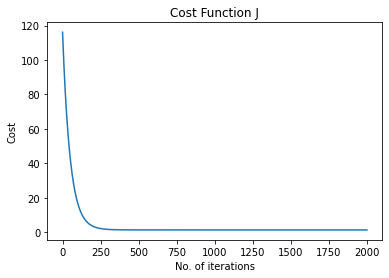

In [27]:
#Plot the cost function...
plt.plot(past_costs)
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.show()

In [32]:
print(past_costs[-1])

1.3530030738174765


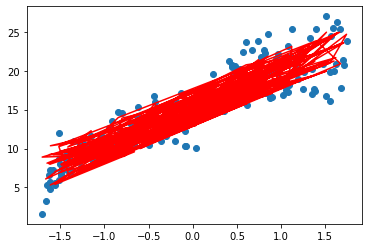

In [23]:
#plot to show final linear regression line
prediction = np.dot(x, theta)
plt.scatter(x[:,1],y)
plt.plot(x[:,1],prediction,color="red")
plt.show()